<a href="https://colab.research.google.com/github/Coldplx/Prueba01/blob/master/Gauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

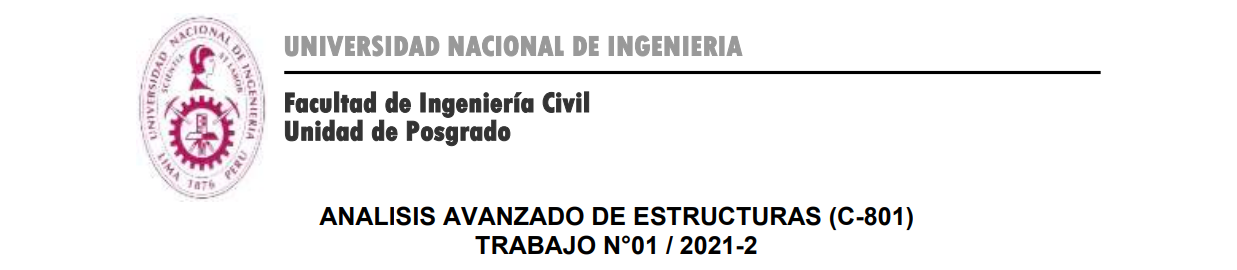

**Pregunta única:** Generar una rutina para la solución de un sistema de ecuaciones lineales
usando: a) el método de eliminación de Gauss y b) una matriz banda. Para la verificación de 
la rutina usar el siguiente ejemplo. Adicionalmente debe añadir otro ejemplo de verificación 
tomado de cualquier libro de análisis estructural.

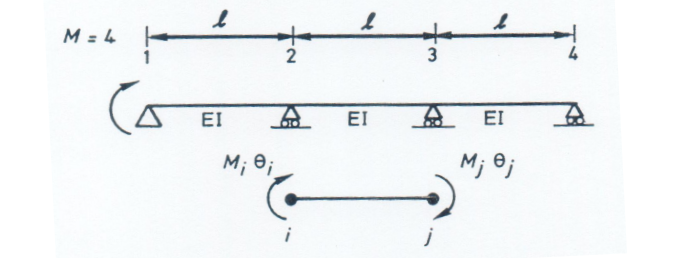

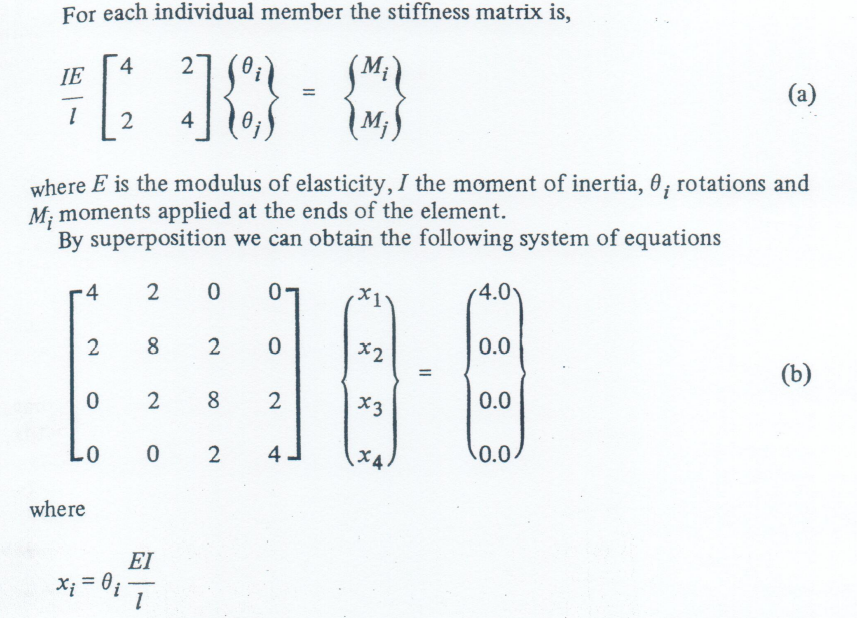

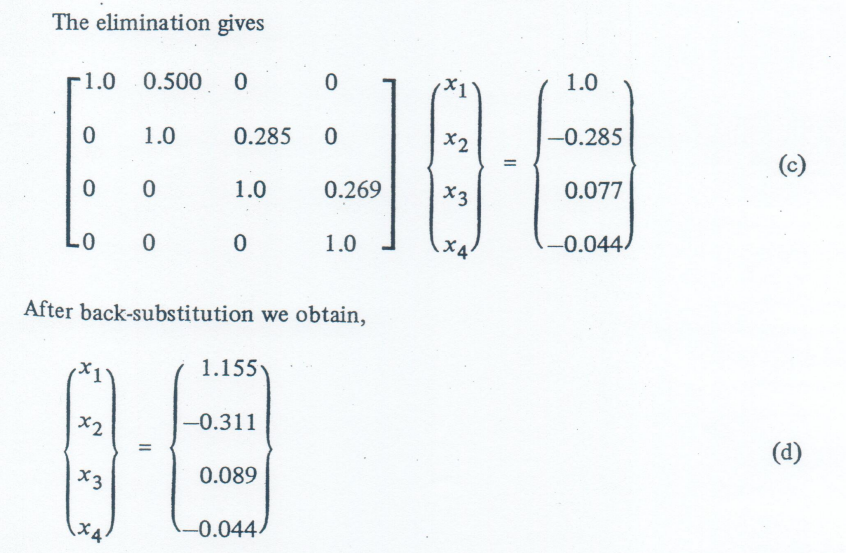

### IMPORTACIÓN DE LIBRERIAS

In [ ]:
import numpy as np # Librería para el soporte de vectores y matrices
np.set_printoptions(precision=3,linewidth=500)

# RUTINAS

###### GAUSS GENERALIZADO


In [ ]:
def solve_gauss(matrix, vector, tol=1.0E-8):
    """
    Rutina para la solución de un sistema de ecuaciones lineales
    por el método de gauss generalizado.

    matrix: Matriz de Coeficientes [Numpy array]
    vector: Coeficientes Independientes [Numpy array]
    """    
    from copy import copy
    A = copy(matrix)
    B = copy(vector)
    N = A.shape[0]  

    N1 = N - 1

    for K in range(N1):
        C = A[K,K]
        K1 = K + 1

        if abs(C) < tol:
            print('Singular Matrix')
            D = 0
            return None, D 
        #
        # Divide row by diagonal coefficient
        #
        for J in range(K1, N):
            A[K,J] = A[K,J]/C
        B[K] = B[K]/C
        #
        # Eliminate unknown X[K] from row I
        #
        for I in range(K1, N):
            C = A[I,K]
            for J in range(K1,N):
                A[I,J] = A[I,J] - C*A[K,J]
            B[I] = B[I] - C*B[K]

    if abs(A[-1,-1]) < tol:
        print('Singular Matrix')
        D = 0
        return None, D 
    #
    # Compute last unknown
    #
    B[-1] = B[-1]/A[-1,-1]
    #
    # Apply backsubtiitution process to compute remaining unknowns
    #
    for K in range(N1)[::-1]: # K  from N-1 to 1
        for J in range(K+1,N):
            B[K] = B[K] - A[K,J]*B[J]
    #
    # Compute value of determinant
    # 
    D = 1
    for I in range(N):
        D = D*A[I,I]
    
    return B, D

###### GAUSS PARA MATRICES BANDA SIMÉTRICAS

In [ ]:
def solve_gauss_band(matrix, vector, tol=1.0E-8):
    """
    Rutina para la solución de un sistema de ecuaciones lineales
    por el método de gauss generalizado para matrices bandas 
    simétricas.

    matrix: Matriz de Coeficientes en Sistema Banda [Numpy array]
    vector: Coeficientes Independientes [Numpy array]
    """    
    from copy import copy

    A = copy(matrix)
    B = copy(vector)
    N, MS = A.shape   
    D = np.ones(MS)

    N1 = N - 1

    for K in range(1, N1+1):
        C = A[K-1,1-1]
        K1 = K + 1 

        if abs(C) < tol:
            print('Singular Matrix')
            D = 0
            return None, D 
        #
        # Divide row by diagonal coefficient
        #
        NI = K1 + MS - 2
        L = min(NI, N)
        
        for J in range(2, MS+1):
            D[J-1] = A[K-1,J-1]
        for J in range(K1, L+1):
            K2 = J - K + 1
            A[K-1,K2-1] = A[K-1,K2-1]/C
        B[K-1] = B[K-1]/C
        #
        # Eliminate unknown X[K] from row I
        #
        for I in range(K1, L+1):
            K2 = I - K1 + 2
            C = D[K2-1]

            for J in range(I, L+1):
                K2 = J - I + 1
                K3 = J - K + 1
                A[I-1, K2-1] = A[I-1, K2-1] - C*A[K-1, K3-1]
            B[I-1] = B[I-1] - C*B[K-1]
    if abs(A[-1,0]) < tol:
        print('Singular Matrix')
        D = 0
        return None, D 
    #
    # Compute last unknown
    #
    B[-1] = B[-1]/A[-1,1-1]
    #
    # Apply backsubtiitution process to compute remaining unknowns
    #
    for I in range(1, N1+1):
        K = N - I
        K1 = K + 1 
        NI = K1 + MS - 2
        L = min(NI, N)

        for J in range(K1, L+1):
            K2 = J - K + 1
            B[K-1] = B[K-1] - A[K-1,K2-1]*B[J-1]
    #
    # Compute value of determinant
    # 
    D = 1
    for I in range(1,N+1):
        D = D*A[I-1,0]
    
    return B, D

###### FUNCIÓN AUXILIAR

In [ ]:
def get_band_form(matrix, tol=1.0E-8):
    '''
    Toma una matriz simétrica y la devuelve en su forma banda.

    matrix: Matriz de Coeficientes simétrica [Numpy array]
    '''
    MSs = []
    N = matrix.shape[0]

    for i in range(N):
        ms = N - i

        for j in range(i, N)[::-1]:
            if abs(matrix[i,j]) < tol:
                ms -= 1
            else:
                break
        MSs.append(ms)
    
    MS = max(MSs)

    band = np.zeros((N, MS))
    for i in range(N):
        J = min(MS, N-i)
        for j in range(i, i+J):
            band[i,j-i] = matrix[i,j]
            
    return band


# SOLUCIÓN - PRIMERA PARTE

In [ ]:
#################################################
###### Definiendo los vectores y matrices #######
#################################################

M = np.array([[4.0, 2.0, 0.0, 0.0],
              [2.0, 8.0, 2.0, 0.0],
              [0.0, 2.0, 8.0, 2.0],
              [0.0, 0.0, 2.0, 4.0]])

b = np.array([[4.0],
              [0.0],
              [0.0],
              [0.0]])

#### a) Método de Eliminación de Gauss










In [ ]:
x_a, d = solve_gauss(M, b)
print('Solución del Sistema de Ecuaciones:\n', x_a)

Solución del Sistema de Ecuaciones:
 [[ 1.156]
 [-0.311]
 [ 0.089]
 [-0.044]]


#### b) Matriz Banda

In [ ]:
M_band = get_band_form(M)
print('Forma Banda de la Matriz:\n', M_band)

Forma Banda de la Matriz:
 [[4. 2.]
 [8. 2.]
 [8. 2.]
 [4. 0.]]


In [ ]:
x_b, d = solve_gauss_band(M_band, b)
print('Solución del Sistema de Ecuaciones:\n', x_b)

Solución del Sistema de Ecuaciones:
 [[ 1.156]
 [-0.311]
 [ 0.089]
 [-0.044]]


# SOLUCIÓN - SEGUNDA PARTE

Ejemplo de verificación:
Para esto se usó el problema 3.6.3 del libro de "Analisis Matricial de Estructuras" de E.Blanco, M.Cervera y B.Suarez. 

Aplicando el Método de Rigidez, resolver la estructura de la Figura
siguiente para los valores: a = 5m, EI = 2·105 kN·m2, EA = 107 kN, teniendo en
cuenta que las barras tienen las mismas propiedades mecánicas.
Calcular el valor de F que corresponda a un incremento uniforme de temperatura Δt = 20ºC, y los desplazamientos en los nudos. Considerar un coeficiente de dilatación del material de α =10−6 / ºC .

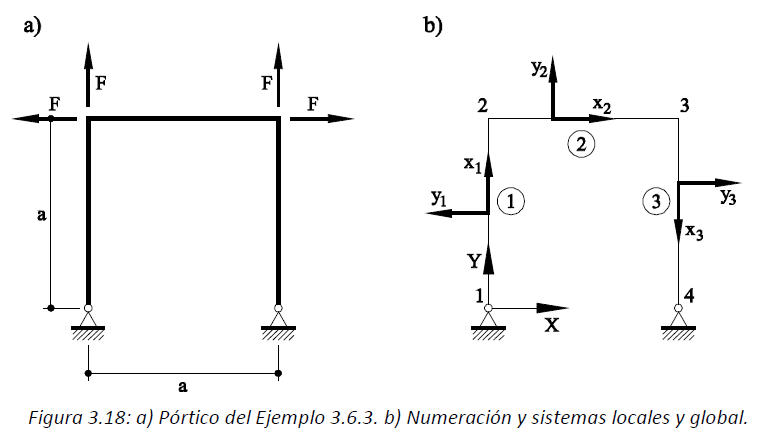

Las reacciones se calculan como:F = EA α Δt = 200 kN que producen un estado de compresión idéntico en todas las barras. Introduciendo las condiciones de apoyo de la estructura, es decir, apoyos articulados en los nudos 1 y 4, se eliminan las ecuaciones (filas y columnas) que corresponden a los grados de libertad prescritos (1, 2 y 10, 11), obteniéndose el sistema de ecuaciones reducido siguiente:
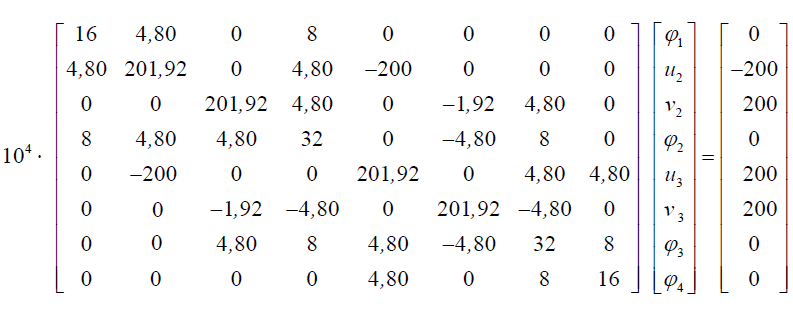

Resolviendo, se obtienen los valores de los movimientos incógnita, que son los giros de los nudos de la estructura y los desplazamientos de los nudos 2 y 3:

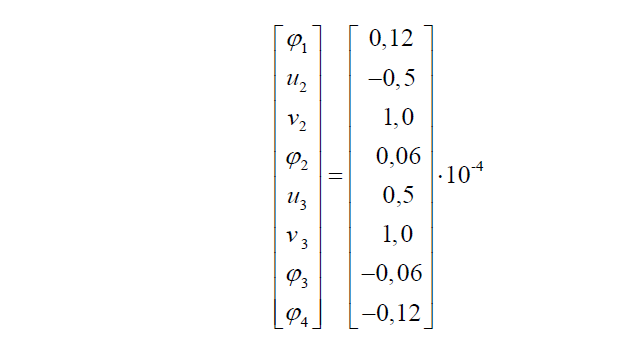

In [ ]:
M = np.array([[16.0,    4.8,        0.0,        8.0,    0.0,        0.0,        0.0,    0.0],
              [4.8,     201.92,     0.0,        4.8,    -200.0,     0.0,        0.0,    0.0],
              [0.0,     0.0,        201.92,     4.8,    0.0,        -1.92,      4.8,    0.0],
              [8.0,     4.8,        4.8,        32.0,   0.0,        -4.8,       8.0,    0.0],
              [0.0,     -200.0,     0.0,        0.0,    201.92,     0.0,        4.8,    4.8],
              [0.0,     0.0,       -1.92,      -4.8,    0.0,        201.92,     -4.8,   0.0],
              [0.0,     0.0,        4.8,        8.0,    4.8,        -4.8,       32.0,   8.0],
              [0.0,     0.0,        0.0,        0.0,    4.8,        0.0,        8.0,    16.0]])*10000

b = np.array([[0.0   ],
              [-200.0],
              [200.0 ],
              [0.0   ],
              [200.0 ],
              [200.0 ],
              [0.0   ],
              [0.0   ]])

a) Método de Eliminación de Gauss

In [ ]:
x_a, d = solve_gauss(M, b)
print('Solución del Sistema de Ecuaciones:\n', x_a)

Solución del Sistema de Ecuaciones:
 [[ 1.199e-05]
 [-4.998e-05]
 [ 1.000e-04]
 [ 5.997e-06]
 [ 4.998e-05]
 [ 1.000e-04]
 [-5.997e-06]
 [-1.199e-05]]


b) Matriz Banda

In [ ]:
M_band = get_band_form(M)
print('Forma Banda de la Matriz:\n', M_band)

Forma Banda de la Matriz:
 [[  160000.    48000.        0.    80000.        0.]
 [ 2019200.        0.    48000. -2000000.        0.]
 [ 2019200.    48000.        0.   -19200.    48000.]
 [  320000.        0.   -48000.    80000.        0.]
 [ 2019200.        0.    48000.    48000.        0.]
 [ 2019200.   -48000.        0.        0.        0.]
 [  320000.    80000.        0.        0.        0.]
 [  160000.        0.        0.        0.        0.]]


In [ ]:
x_b, d = solve_gauss_band(M_band, b)
print('Solución del Sistema de Ecuaciones:\n', x_b)

Solución del Sistema de Ecuaciones:
 [[ 1.199e-05]
 [-4.998e-05]
 [ 1.000e-04]
 [ 5.997e-06]
 [ 4.998e-05]
 [ 1.000e-04]
 [-5.997e-06]
 [-1.199e-05]]
